<a href="https://colab.research.google.com/github/hectorpilo/bootcamp-ds-sonda/blob/main/CORE_Clasificacion_Optimizacion_Hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/BBDD/insurance.csv"
import pandas as pd
df = pd.read_csv(path)

Mounted at /content/drive


# **Carga y Exploración Inicial de Datos:**
* Cargar el dataset desde Kaggle.
* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
* Identificar y documentar los valores faltantes y outliers en el dataset.

In [6]:
# Tipos de datos y valores nulos
df.info()
# Estadísticas generales (sólo para variables numéricas)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Primeras filas del dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Verificacion si hay valores nulos o duplicados

In [8]:
# ¿Hay valores nulos?
df.isnull().sum()
# ¿Hay filas duplicadas?
df.duplicated().sum()
# Mostrar filas duplicadas (si las hay)
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Valores unicos y frecuencia por columna

In [9]:
# Cantidad de valores únicos por columna
df.nunique()

# Mostrar los valores únicos de cada columna categórica
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())


Columna: sex
sex
male      676
female    662
Name: count, dtype: int64

Columna: smoker
smoker
no     1064
yes     274
Name: count, dtype: int64

Columna: region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


deteccion de valores repetidos

In [10]:
# Por ejemplo, si quieres ver si hay valores repetidos exactos en una columna:
df['region'].value_counts()  # Cámbialo por la columna que quieras analizar

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Grafica Rapida PairPlot

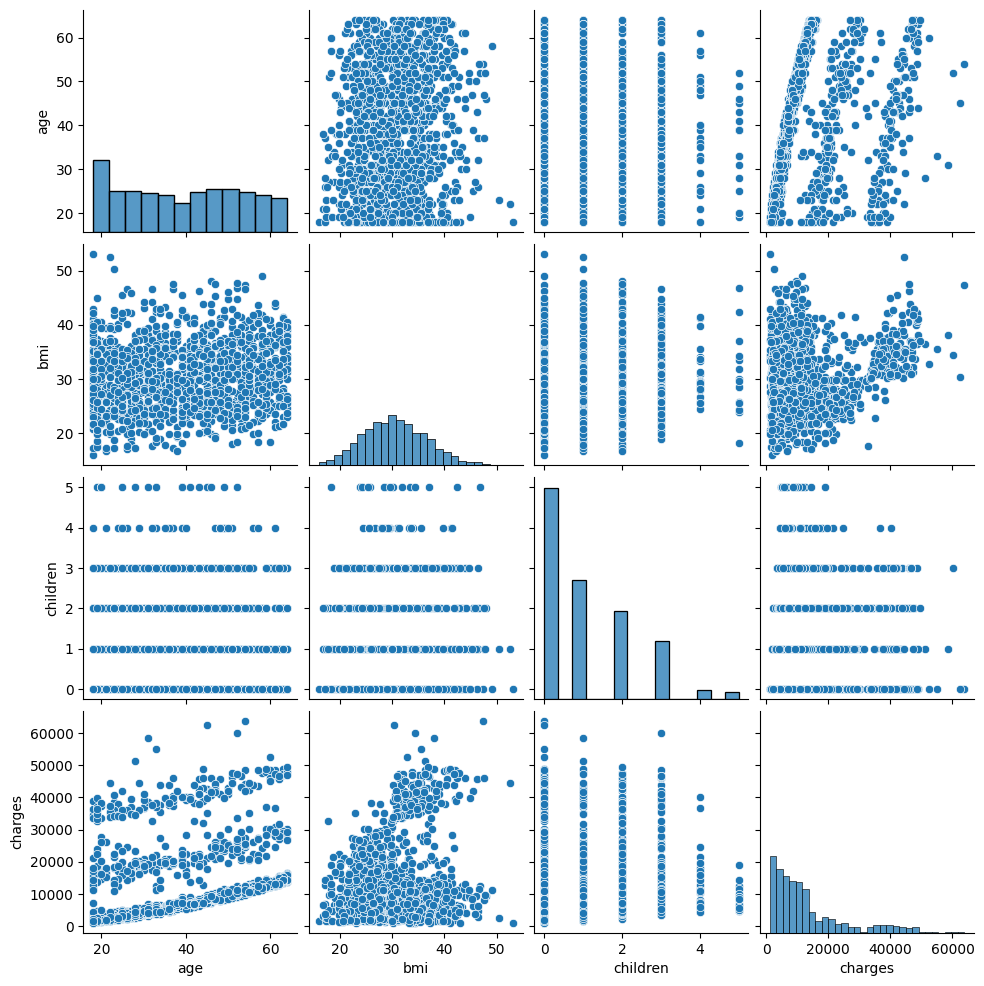

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [12]:
df = df.drop_duplicates() #eliminación de datos duplicados

Revision de correlación numerica

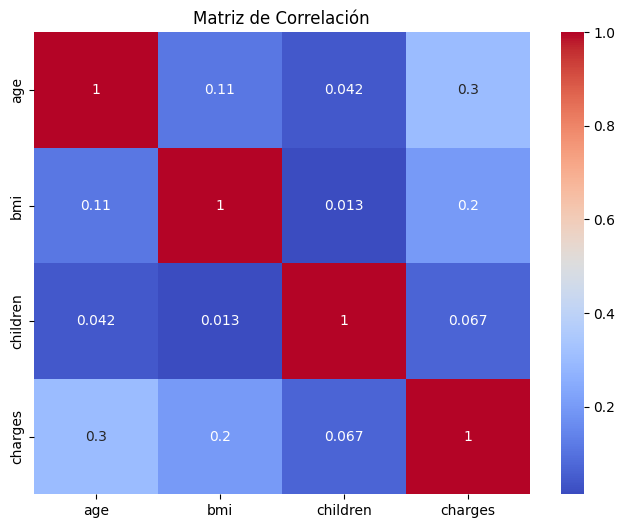

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


La matriz muestra que charges (el costo del seguro) tiene una correlación moderada con la edad (0.3) y leve con el BMI (0.2), lo cual indica que estas variables podrían influir en el costo, pero no de manera determinante por sí solas. La variable children tiene muy poca correlación con cualquier otra, y en general, las correlaciones no son altas, lo que sugiere que podrían haber relaciones no lineales o efectos categóricos importantes (como el hábito de fumar) que no se capturan solo con la correlación

Visualizacion de variables categoricas

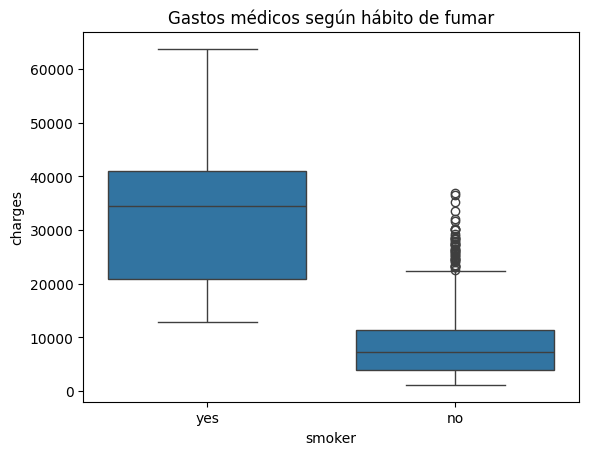

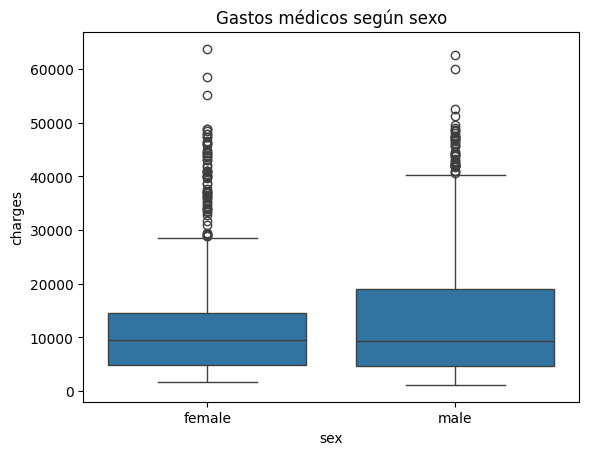

In [14]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Gastos médicos según hábito de fumar")
plt.show()

sns.boxplot(x='sex', y='charges', data=df)
plt.title("Gastos médicos según sexo")
plt.show()


📌 Boxplot de charges según smoker
Existe una diferencia drástica entre fumadores y no fumadores. Los fumadores tienen gastos médicos considerablemente más altos, con una mediana cercana a los 35.000 dólares, frente a unos 7.000 en los no fumadores. Esto sugiere que fumar es el factor más influyente en los costos médicos, probablemente el más potente en un futuro modelo predictivo.

📌 Boxplot de charges según sex
No se observan diferencias significativas en los gastos médicos entre hombres y mujeres. Las distribuciones y medianas son similares, lo que indica que el sexo no tiene un impacto relevante en los costos del seguro por sí solo, aunque podrían aparecer efectos combinados al analizar con otras variables.

ver distribución de BMI

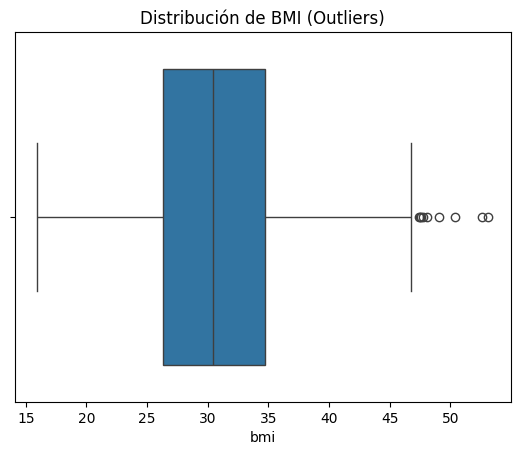

In [15]:
sns.boxplot(x=df['bmi'])
plt.title("Distribución de BMI (Outliers)")
plt.show()

📌 Boxplot de bmi (Outliers)
El índice de masa corporal (bmi) tiene una distribución simétrica con algunos outliers por sobre 45, lo cual representa personas con obesidad severa. Si bien estos valores no son errores, conviene observar si influyen de manera desproporcionada en los modelos. Puede considerarse tratarlos como valores extremos o mantenerlos según el enfoque.

# **Preprocesamiento de Datos:**
* Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.

In [16]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

definicion de funcion a evaluar

In [18]:
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Modelo: {modelo.__class__.__name__}")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}\n")

entreno y evaluacion de los modelos.

In [19]:
# Modelo base
modelo_lr = LinearRegression()
evaluar_modelo(modelo_lr, X_train, X_test, y_train, y_test)

# Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
evaluar_modelo(modelo_rf, X_train, X_test, y_train, y_test)

# XGBoost
modelo_xgb = XGBRegressor(random_state=42, verbosity=0)
evaluar_modelo(modelo_xgb, X_train, X_test, y_train, y_test)

# LightGBM
modelo_lgbm = LGBMRegressor(random_state=42)
evaluar_modelo(modelo_lgbm, X_train, X_test, y_train, y_test)

Modelo: LinearRegression
MAE:  4177.05
MSE:  35478020.68
RMSE: 5956.34

Modelo: RandomForestRegressor
MAE:  2652.58
MSE:  22221459.84
RMSE: 4713.96

Modelo: XGBRegressor
MAE:  2922.40
MSE:  24786419.95
RMSE: 4978.60

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 8
[LightGBM] [Info] Start training from score 13030.203373
Modelo: LGBMRegressor
MAE:  2754.05
MSE:  21087845.55
RMSE: 4592.15



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ajuste de hiperparametros

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

# Mejor modelo
print("Mejores parámetros:", grid_rf.best_params_)
print("Mejor RMSE validación cruzada:", -grid_rf.best_score_)

Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mejor RMSE validación cruzada: 4810.42928697418


# **Ahora un modelo de clasificacion**

In [22]:
df_class = df.copy()
df_class['charges_class'] = pd.qcut(df_class['charges'], q=3, labels=['Bajo', 'Medio', 'Alto']) #Variable Categorica
y = df_class['charges_class']  # esto es lo que necesitas para clasificación
# Ahora sí codifico el resto
df_class_encoded = pd.get_dummies(df_class.drop('charges_class', axis=1), drop_first=True)
# Separación final
X = df_class_encoded


In [23]:
from sklearn.preprocessing import StandardScaler #escalar variables numericas

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split #separar datos para train y test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


### **entrenar y evaluar LogisticRegression, KNN y DecisionTreeClassifier con validación cruzada**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Definir los modelos
modelos = {
    'Regresión Logística': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42)
}

# Evaluar cada modelo con validación cruzada (5 folds)
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')
    print(f"📌 {nombre}")
    print(f"Accuracy promedio: {scores.mean():.4f}")
    print(f"Accuracy por fold: {scores}\n")

📌 Regresión Logística
Accuracy promedio: 0.9532
Accuracy por fold: [0.96261682 0.96261682 0.93925234 0.96261682 0.93896714]

📌 KNN
Accuracy promedio: 0.8531
Accuracy por fold: [0.8411215  0.86915888 0.87383178 0.8411215  0.84037559]

📌 Árbol de Decisión
Accuracy promedio: 0.9991
Accuracy por fold: [1.        1.        1.        0.9953271 1.       ]



# **Busqueda de hiperparametros**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Rango de valores para probar k
param_grid_knn = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)

# Resultados
print("📌 Mejor KNN")
print("Mejores parámetros:", grid_knn.best_params_)
print("Accuracy validación cruzada:", grid_knn.best_score_)

📌 Mejor KNN
Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy validación cruzada: 0.9026984335922075


In [27]:
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tree,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_tree.fit(X_train, y_train)

# Resultados
print("📌 Mejor Árbol de Decisión")
print("Mejores parámetros:", grid_tree.best_params_)
print("Accuracy validación cruzada:", grid_tree.best_score_)

📌 Mejor Árbol de Decisión
Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy validación cruzada: 0.9990654205607477


🔍 KNN - Clasificación en test:
              precision    recall  f1-score   support

        Alto       0.96      0.87      0.91        90
        Bajo       0.85      0.92      0.89        89
       Medio       0.82      0.84      0.83        89

    accuracy                           0.88       268
   macro avg       0.88      0.88      0.88       268
weighted avg       0.88      0.88      0.88       268



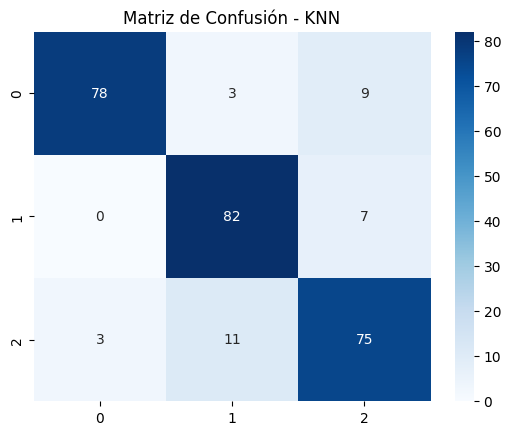

🔍 Árbol de Decisión - Clasificación en test:
              precision    recall  f1-score   support

        Alto       1.00      0.99      0.99        90
        Bajo       1.00      1.00      1.00        89
       Medio       0.99      1.00      0.99        89

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



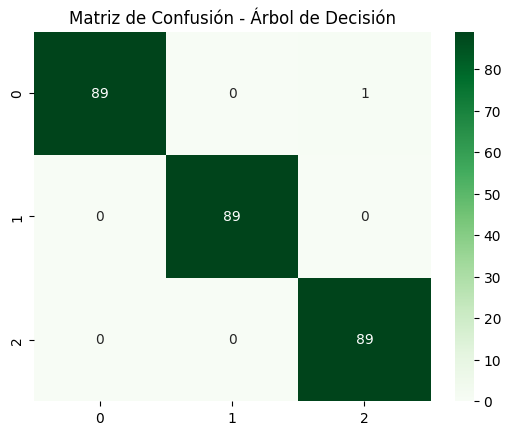

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar mejor KNN
mejor_knn = KNeighborsClassifier(**grid_knn.best_params_)
mejor_knn.fit(X_train, y_train)
y_pred_knn = mejor_knn.predict(X_test)

print("🔍 KNN - Clasificación en test:")
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - KNN")
plt.show()


# Evaluar mejor Árbol
mejor_tree = DecisionTreeClassifier(**grid_tree.best_params_, random_state=42)
mejor_tree.fit(X_train, y_train)
y_pred_tree = mejor_tree.predict(X_test)

print("🔍 Árbol de Decisión - Clasificación en test:")
print(classification_report(y_test, y_pred_tree))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

Curva ROC

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Clases originales
clases = ['Bajo', 'Medio', 'Alto']

# Binarizamos y para usar ROC multiclase
y_bin = label_binarize(y_test, classes=clases)
n_classes = y_bin.shape[1]

In [31]:
# Entrenamos modelo en formato multiclase
modelo_ovr = OneVsRestClassifier(DecisionTreeClassifier(**grid_tree.best_params_, random_state=42))
modelo_ovr.fit(X_train, label_binarize(y_train, classes=clases))
y_score = modelo_ovr.predict_proba(X_test)

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

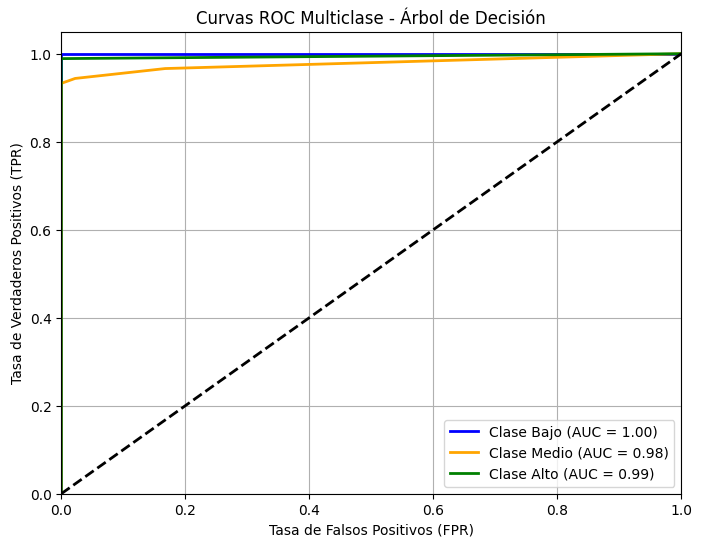

In [33]:
plt.figure(figsize=(8, 6))

colors = ['blue', 'orange', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {clases[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC Multiclase - Árbol de Decisión')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

CURVA ROC KNN MULTICLASE

In [34]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarizamos nuevamente y_test (ya lo hiciste, pero por si acaso)
y_bin = label_binarize(y_test, classes=['Bajo', 'Medio', 'Alto'])
n_classes = y_bin.shape[1]

# Entrenar mejor KNN con OneVsRest
mejor_knn_ovr = OneVsRestClassifier(KNeighborsClassifier(**grid_knn.best_params_))
mejor_knn_ovr.fit(X_train, label_binarize(y_train, classes=['Bajo', 'Medio', 'Alto']))
y_score_knn = mejor_knn_ovr.predict_proba(X_test)


In [35]:
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_bin[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])


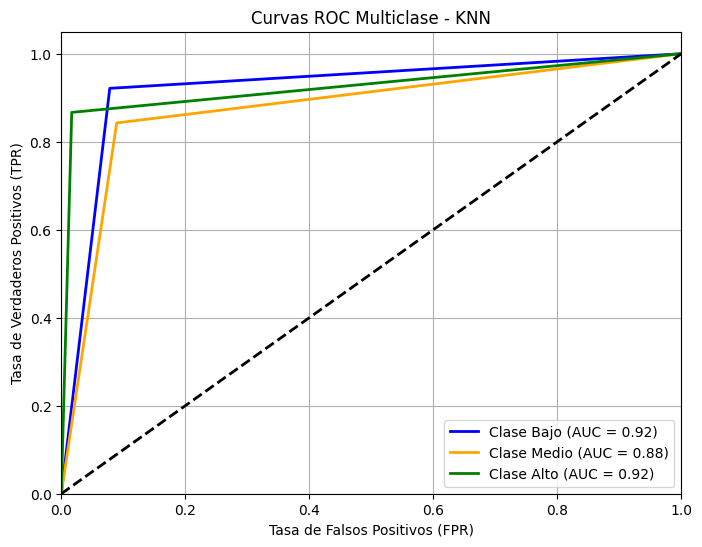

In [36]:
plt.figure(figsize=(8, 6))

colors = ['blue', 'orange', 'green']
clases = ['Bajo', 'Medio', 'Alto']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_knn[i], tpr_knn[i], color=color, lw=2,
             label=f'Clase {clases[i]} (AUC = {roc_auc_knn[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC Multiclase - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Documentación y Entrega:
* Documentar todos los pasos del proceso en un notebook de Jupyter, incluyendo explicaciones detalladas y justificaciones para cada decisión tomada.
* Subir el notebook y los resultados a un repositorio de GitHub.
* Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.